In [112]:
import pandas as pd 

df_classwise=pd.read_csv("/kaggle/input/classwise-balanced-ciciot-2023/ClassWise_Labeled_Balanced_Dataset.csv")
df_binary_Normal=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/Normal_baised_data.csv")
df_perfect_binary=pd.read_csv("/kaggle/input/binary-classified-ciciot-2023-dataset/EqualBinaryData_CICIoT_2023.csv")

<h3>For Normal_Baised_data.csv : DecisionTreeClassifier got highest accuracy 94% on this parameters(max_depth=20,min_samples_split=20,random_state=42).
</h3>

In [113]:

#for Normal_baised_data.csv
# df=pd.DataFrame(df_binary_Normal)

#For Perfect binary data
df=pd.DataFrame(df_perfect_binary)


In [114]:
import numpy as np

# Binary Data

# Preprocessing

In [115]:
df.isnull().sum()

Unnamed: 0          0
Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate                0
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                53
Tot size            0
IAT                 0
Number              0
Variance           53
Label               0
dtype: int64

In [116]:
(np.isinf(df['Rate'])).value_counts()

Rate
False    1195768
True          56
Name: count, dtype: int64

<h2>Imputer cannot handle the infinite values in the dataset 

In [117]:
# from sklearn.impute import SimpleImputer
# impute=SimpleImputer(strategy='mean')
# test=df.copy()
# test=test.select_dtypes(include='number')
# impute.fit_transform(test)

We will replace the infinite with null values and just drop the null values as they are very few.

In [118]:
df=df.replace(np.inf,np.nan)
(np.isinf(df['Rate'])).value_counts()
df.isnull().sum()

Unnamed: 0          0
Header_Length       0
Protocol Type       0
Time_To_Live        0
Rate               56
fin_flag_number     0
syn_flag_number     0
rst_flag_number     0
psh_flag_number     0
ack_flag_number     0
ece_flag_number     0
cwr_flag_number     0
ack_count           0
syn_count           0
fin_count           0
rst_count           0
HTTP                0
HTTPS               0
DNS                 0
Telnet              0
SMTP                0
SSH                 0
IRC                 0
TCP                 0
UDP                 0
DHCP                0
ARP                 0
ICMP                0
IGMP                0
IPv                 0
LLC                 0
Tot sum             0
Min                 0
Max                 0
AVG                 0
Std                53
Tot size            0
IAT                 0
Number              0
Variance           53
Label               0
dtype: int64

In [126]:
df=df.dropna()
df.isnull().sum()


Unnamed: 0         0
Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IGMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Variance           0
Label              0
dtype: int64

<h2>Decision Tree With</h2>

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [145]:
df=df.sample(frac=1,random_state=42)


In [149]:
df.reset_index(drop=True,inplace=True)

In [150]:
X=df.drop('Label',axis=1)
y=df['Label']
y

0          1
1          1
2          1
3          0
4          0
          ..
1195763    1
1195764    1
1195765    1
1195766    1
1195767    1
Name: Label, Length: 1195768, dtype: int64

,Unnamed: 0,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
0,6226,29.6,6,215.2,1769.599190,0.0,0.0,0.0,0.0,0.9,...,1.0,654,60,66,65.4,1.897367,65.4,0.000565,10,3.600000e+00
1,5755,32.0,6,64.0,492.977751,0.0,0.0,0.0,0.0,1.0,...,1.0,15140,1514,1514,1514.0,0.000000,1514.0,0.010253,10,0.000000e+00
2,8638,32.0,6,114.1,2163.462114,0.0,0.0,0.0,0.0,1.0,...,1.0,16588,66,7306,1658.8,2098.351353,1658.8,0.000477,10,4.403078e+06
3,482280,19.2,6,91.7,13.246930,0.0,0.2,0.0,0.2,0.3,...,0.9,1349,60,344,134.9,95.845304,134.9,0.079455,10,9.186322e+03
4,33944,26.0,6,150.3,271.841962,0.0,0.0,0.2,0.2,0.7,...,1.0,2318,60,1470,231.8,438.031404,231.8,0.003693,10,1.918715e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195763,5434,27.2,6,89.2,591.889138,0.1,0.0,0.0,0.6,0.8,...,1.0,3823,60,1466,382.3,464.208538,382.3,0.001995,10,2.154896e+05
1195764,10006,32.0,6,64.0,1789.913370,0.0,0.0,0.0,0.0,1.0,...,1.0,16588,1514,2962,1658.8,457.897805,1658.8,0.000586,10,2.096704e+05
1195765,14484,46.0,6,93.5,14968.965025,0.0,0.0,0.0,0.4,1.0,...,1.0,11968,94,2858,1196.8,1269.306792,1196.8,0.000096,10,1.611140e+06
1195766,7113,23.2,6,80.7,134.658546,0.0,0.0,0.0,0.2,0.7,...,0.8,6450,60,5244,645.0,1626.855249,645.0,0.007659,10,2.646658e+06


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [153]:
min_sp=[5,10,15,20,25,30,35]
max_dp=[5,10,15,20,25,30,35]

In [154]:
DT=DecisionTreeClassifier(max_depth=10,min_samples_split=2,random_state=42)
check=DT.fit(X_train,y_train)


In [155]:
y_pre=DT.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pre))

print("Classification report:\n",classification_report(y_test,y_pre))

Accuracy: 0.9971622190443535
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    179689
           1       0.99      1.00      1.00    179042

    accuracy                           1.00    358731
   macro avg       1.00      1.00      1.00    358731
weighted avg       1.00      1.00      1.00    358731



Confusion Matrix (Counts):
                  Predicted Intrusion  Predicted Normal
Actual Intrusion               178691               998
Actual Normal                      20            179022


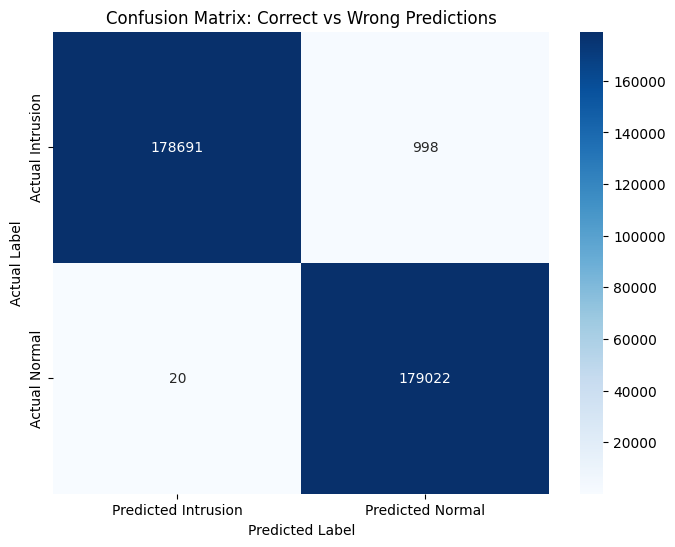

In [156]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pre)

cm_df = pd.DataFrame(cm, index=['Actual Intrusion', 'Actual Normal'], 
                         columns=['Predicted Intrusion', 'Predicted Normal'])

print("Confusion Matrix (Counts):")
print(cm_df)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Correct vs Wrong Predictions')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

<h2>Validating accuracy:</h2>

<h3>Train and Test accuracy comparision</h3>

In [157]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)
train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")
print(f"Difference:        {train_acc - test_acc:.4f}")

if train_acc > 0.99 and (train_acc - test_acc) > 0.05:
    print("\nDIAGNOSIS: High probability of OVERFITTING.")
elif train_acc < 0.80:
    print("\nDIAGNOSIS: Likely UNDERFITTING (Model is too simple).")
else:
    print("\nDIAGNOSIS: Good Fit (Generalized well).")
    


Training Accuracy: 0.9973
Testing Accuracy:  0.9972
Difference:        0.0001

DIAGNOSIS: Good Fit (Generalized well).


<h2>Cross Validation:</h2>

In [158]:
from sklearn.model_selection import cross_val_score

# Run 5-Fold Cross Validation
scores = cross_val_score(DT, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

if scores.std() > 0.03:
    print("\nWarning: High variance. Model is unstable (Overfitting).")
else:
    print("\nModel is stable.")

Cross-Validation Scores: [0.99703956 0.99668833 0.99723191 0.99712318 0.99679703]
Mean Accuracy: 0.9970
Standard Deviation: 0.0002

✅ Model is stable.


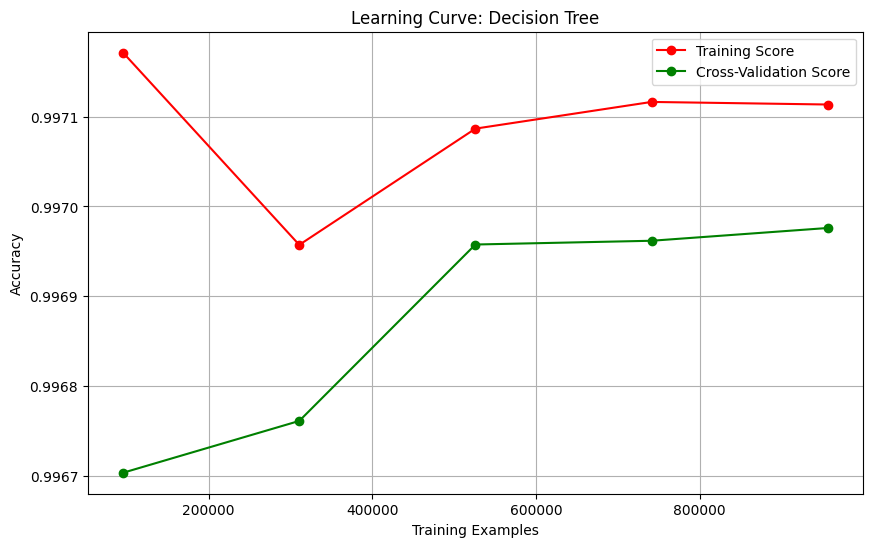

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5) # Check at 10%, 30%, ... 100% of data
    )
    
    # Calculate means
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-Validation Score")
    
    plt.title("Learning Curve: Decision Tree")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Run it
plot_learning_curve(DT, X, y)

# Visualize the Data 

In [ ]:
# df=df[df['Label']!='Normal']

In [ ]:
# # df.fillna({'Variance':df['Variance'].mean()},inplace=True)
# df.fillna({'Std':df['Std'].mean()},inplace=True)

In [ ]:
# X.isnull().sum()